In [1]:
from matplotlib import pyplot as plt
%run "../HyperParameterOpt/GenerateExperiments/res_experiment.py"

In [2]:
plt.rcParams["figure.figsize"] = [5, 5]

In [3]:
def remove_percent_edges(A, p):
    return remove_edges(A, floor(p * np.sum(A != 0)))

def net_stat(statf, topo, params, remove_ps, nnets=25, n=2500):
    mean_stats = []
    for p in remove_ps:
        make_net = lambda : remove_percent_edges(generate_adj(topo, params, n=n), p)
        stats = [statf(make_net()) for i in range(nnets)]
        mean_stat = np.mean(stats)
        mean_stats.append(mean_stat)
    return mean_stats

def plot_stat(statf, mean_degree, title, ylabel, ps=None, n=1000, nnets=20, watts_rewire=.1):
    if ps is None:
        ps = [0, .1, .2, .3, .4, .5, .6, .7, .8, .9, .92, .94, .96, .98]
    for topo in ["geom", "erdos", "random_digraph"]:
        stat = net_stat(statf, topo, mean_degree, ps, n=n, nnets=nnets)
        plt.plot(ps, stat, label=topo.capitalize())
    if mean_degree == 1:
        ba = net_stat(statf, "barab1", None, ps, n=n, nnets=nnets)
        plt.plot(ps, ba, label="Barabasi")
    if mean_degree == 2:
        ba = net_stat(statf, "barab2", None, ps, n=n, nnets=nnets)
        ws = net_stat(statf, "watts2", watts_rewire, ps, n=n, nnets=nnets)
        plt.plot(ps, ba, label="Barabasi")
        plt.plot(ps, ws, label="Watts")
    if mean_degree == 4:
        ba = net_stat(statf, "barab4", None, ps, n=n, nnets=nnets)
        ws = net_stat(statf, "watts4", watts_rewire, ps, n=n, nnets=nnets)
        plt.plot(ps, ba, label="Barabasi")
        plt.plot(ps, ws, label="Watts")
    plt.title(title)
    plt.xlabel("Percent of edges removed")
    plt.ylabel(ylabel)
    plt.legend()
    plt.show()

## Giant Weak Component

In [4]:
def giant_comp(A, strong=True):
    if strong:
        compf = nx.strongly_connected_components
    else:
        compf = nx.weakly_connected_components
    g = nx.DiGraph(A.T.tolil())
    n = A.shape[0]
    cc = [list(c) for c in compf(g)]
    cc_sz = [len(c) for c in cc]
    return np.max(cc_sz)/n

wcc_comp = lambda x: giant_comp(x, strong=False)

title = "Giant Weak Component"
ylabel = "Percent of nodes in component"

#### Giant Weakly Connected Component (Mean Degree = 1)

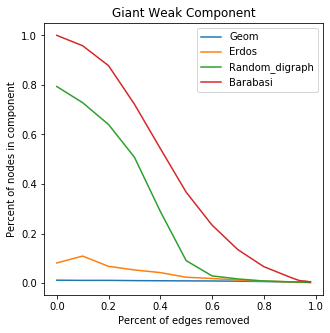

In [5]:
plot_stat(wcc_comp, 1.0, title, ylabel)

#### Giant Weakly Connected Component (Mean Degree = 2)

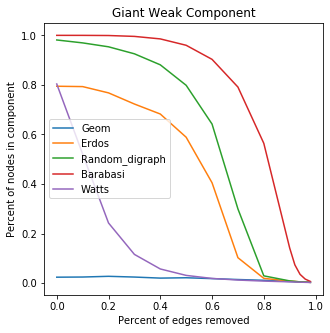

In [6]:
plot_stat(wcc_comp, 2.0, title, ylabel)

#### Giant Weakly Connected Component (Mean Degree = 4)

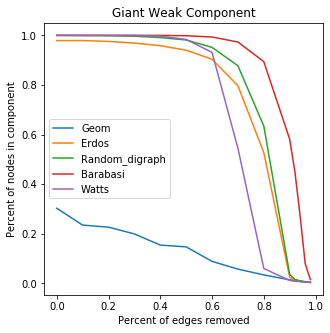

In [8]:
plot_stat(wcc_comp, 4.0, title, ylabel)

#### Giant Weak Component for Varying Watts Rewiring Values

#### (Mean degree = 2)

In [55]:
ps = [0, .1, .2, .3, .4, .5, .6, .7, .8, .9, .92, .94, .96, .98]
NNETS = 20
N = 1000
ws2_10 = net_stat(wcc_comp, "watts2", .1, ps, n=N, nnets=NNETS)
ws2_50 = net_stat(wcc_comp, "watts2", .5, ps, n=N, nnets=NNETS)
ws2_70 = net_stat(wcc_comp, "watts2", .7, ps, n=N, nnets=NNETS)

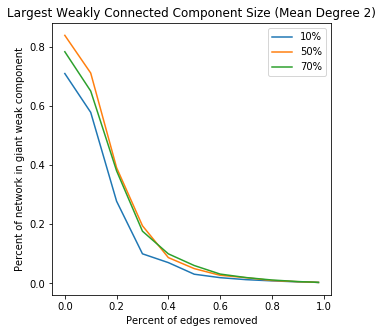

In [71]:
plt.plot(ps, ws2_10, label="10%")
plt.plot(ps, ws2_50, label="50%")
plt.plot(ps, ws2_70, label="70%")
plt.title("Largest Weakly Connected Component Size (Mean Degree 2)")
plt.xlabel("Percent of edges removed")
plt.ylabel("Percent of network in giant weak component")
plt.legend()
plt.show()

#### (Mean degree = 4)

In [64]:
ps = [0, .1, .2, .3, .4, .5, .6, .7, .8, .9, .92, .94, .96, .98]
NNETS = 20
N = 1000
ws4_10 = net_stat(wcc_comp, "watts4", .1, ps, n=N, nnets=NNETS)
ws4_50 = net_stat(wcc_comp, "watts4", .5, ps, n=N, nnets=NNETS)
ws4_70 = net_stat(wcc_comp, "watts4", .7, ps, n=N, nnets=NNETS)

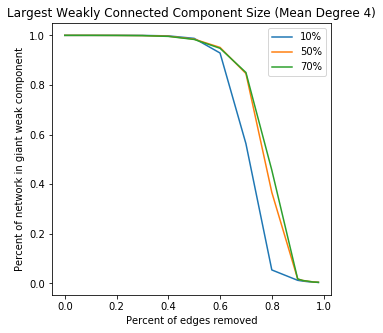

In [72]:
plt.plot(ps, ws4_10, label="10%")
plt.plot(ps, ws4_50, label="50%")
plt.plot(ps, ws4_70, label="70%")
plt.title("Largest Weakly Connected Component Size (Mean Degree 4)")
plt.xlabel("Percent of edges removed")
plt.ylabel("Percent of network in giant weak component")
plt.legend()
plt.show()

## Singletons

In [9]:
def singletons(A):
    g = nx.DiGraph(A.T.tolil())
    n = A.shape[0]
    cc = [list(c) for c in nx.weakly_connected_components(g)]
    cc_sz = np.array([len(c) for c in cc])
    return np.sum(cc_sz == 1) / n
title = "Singletons (Nodes With Zero Edges)"
ylabel = "Percent of network"

#### (Mean Degree = 1)

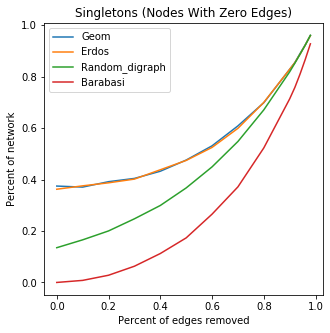

In [10]:
plot_stat(singletons, 1.0, title, ylabel)

#### (Mean Degree = 2)

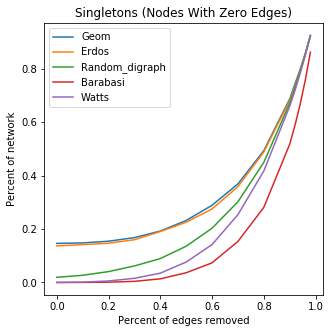

In [11]:
plot_stat(singletons, 2.0, title, ylabel)

#### (Mean Degree = 4)

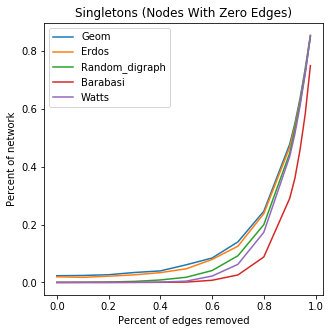

In [12]:
plot_stat(singletons, 4.0, title, ylabel)

#### Singletons for Varying Watts Rewiring Values

#### (Mean degree = 2)

In [14]:
ps = [0, .1, .2, .3, .4, .5, .6, .7, .8, .9, .92, .94, .96, .98]
NNETS = 20
N = 1000
ws2_10 = net_stat(singletons, "watts2", .1, ps, n=N, nnets=NNETS)
ws2_50 = net_stat(singletons, "watts2", .5, ps, n=N, nnets=NNETS)
ws2_70 = net_stat(singletons, "watts2", .7, ps, n=N, nnets=NNETS)

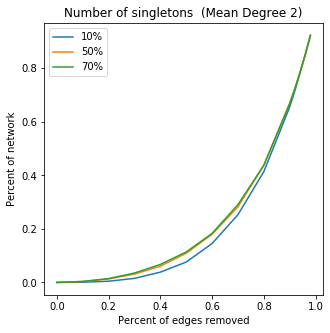

In [16]:
plt.plot(ps, ws2_10, label="10%")
plt.plot(ps, ws2_50, label="50%")
plt.plot(ps, ws2_70, label="70%")
plt.title("Number of singletons  (Mean Degree 2)")
plt.xlabel("Percent of edges removed")
plt.ylabel(ylabel)
plt.legend()
plt.show()

#### (Mean degree = 4)

In [15]:
ps = [0, .1, .2, .3, .4, .5, .6, .7, .8, .9, .92, .94, .96, .98]
NNETS = 20
N = 1000
ws4_10 = net_stat(singletons, "watts4", .1, ps, n=N, nnets=NNETS)
ws4_50 = net_stat(singletons, "watts4", .5, ps, n=N, nnets=NNETS)
ws4_70 = net_stat(singletons, "watts4", .7, ps, n=N, nnets=NNETS)

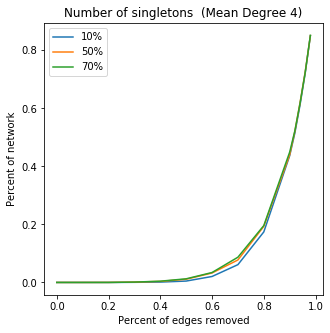

In [17]:
plt.plot(ps, ws4_10, label="10%")
plt.plot(ps, ws4_50, label="50%")
plt.plot(ps, ws4_70, label="70%")
plt.title("Number of singletons  (Mean Degree 4)")
plt.xlabel("Percent of edges removed")
plt.ylabel(ylabel)
plt.legend()
plt.show()

## Small Components

In [18]:
def small_comps(A):
    return 1 - wcc_comp(A) - singletons(A)

title = "Percent of Nodes in Small Components"
ylabel = "Percent of Network"

#### (Mean Degree = 1)

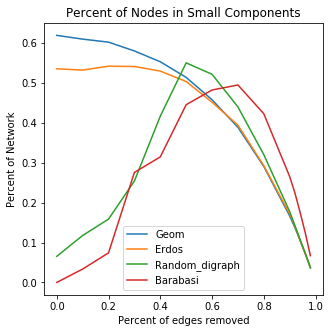

In [19]:
plot_stat(small_comps, 1.0, title, ylabel)

#### (Mean Degree = 2)

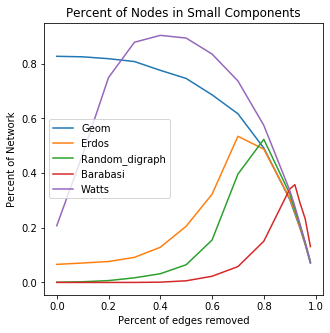

In [20]:
plot_stat(small_comps, 2.0, title, ylabel)

#### (Mean Degree = 4)

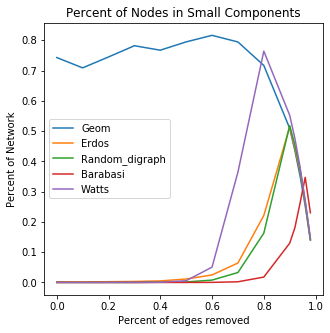

In [21]:
plot_stat(small_comps, 4.0, title, ylabel)

### Varying Watts Rewiring Values

#### (Mean degree = 2)

In [22]:
ps = [0, .1, .2, .3, .4, .5, .6, .7, .8, .9, .92, .94, .96, .98]
NNETS = 20
N = 1000
ws2_10 = net_stat(small_comps, "watts2", .1, ps, n=N, nnets=NNETS)
ws2_50 = net_stat(small_comps, "watts2", .5, ps, n=N, nnets=NNETS)
ws2_70 = net_stat(small_comps, "watts2", .7, ps, n=N, nnets=NNETS)

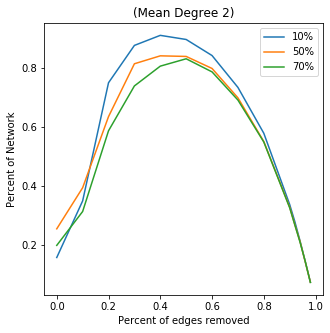

In [23]:
plt.plot(ps, ws2_10, label="10%")
plt.plot(ps, ws2_50, label="50%")
plt.plot(ps, ws2_70, label="70%")
plt.title("(Mean Degree 2)")
plt.xlabel("Percent of edges removed")
plt.ylabel(ylabel)
plt.legend()
plt.show()

#### (Mean degree = 4)

In [24]:
ps = [0, .1, .2, .3, .4, .5, .6, .7, .8, .9, .92, .94, .96, .98]
NNETS = 20
N = 1000
ws4_10 = net_stat(small_comps, "watts4", .1, ps, n=N, nnets=NNETS)
ws4_50 = net_stat(small_comps, "watts4", .5, ps, n=N, nnets=NNETS)
ws4_70 = net_stat(small_comps, "watts4", .7, ps, n=N, nnets=NNETS)

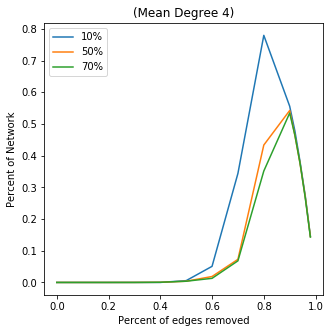

In [25]:
plt.plot(ps, ws4_10, label="10%")
plt.plot(ps, ws4_50, label="50%")
plt.plot(ps, ws4_70, label="70%")
plt.title("(Mean Degree 4)")
plt.xlabel("Percent of edges removed")
plt.ylabel(ylabel)
plt.legend()
plt.show()